# 迴歸：Scikit-Learn 與矩陣求解的比較

In [104]:
from sklearn import datasets
ds= datasets.load_boston()


In [105]:
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [106]:
import pandas as pd

X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = ds.target
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [107]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [109]:
import numpy as np
X.AGE.astype(np.float32)

0      65.199997
1      78.900002
2      61.099998
3      45.799999
4      54.200001
         ...    
501    69.099998
502    76.699997
503    91.000000
504    89.300003
505    80.800003
Name: AGE, Length: 506, dtype: float32

In [110]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [111]:
X.isnull().sum().sum()

0

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [115]:
lr.coef_

array([-0.90086811,  0.63010114,  0.20400119,  0.77513964, -1.74122048,
        3.98015343, -0.80854995, -2.75509722,  2.03655346, -2.1232547 ,
       -2.01882422,  0.99218123, -2.43249672])

In [116]:
lr.intercept_

22.388613861386204

In [117]:
lr.score(X_test, y_test)

0.3485370959946493

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr.predict(X_test))

47.825542356096

In [119]:
mean_squared_error(y_test, lr.predict(X_test)) ** .5

6.915601373423428

In [120]:
from sklearn.metrics import r2_score
r2_score(y_test, lr.predict(X_test))

0.3485370959946493

## 二次迴歸

In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((404, 105), (102, 105))

In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [125]:
lr.score(X_test, y_test)

0.3230893718945017

In [126]:
len(lr.coef_)

105

## 簡單運算

In [127]:
import numpy as np

A = np.array([[2,4],
              [6,2]])

B = np.array([[18],
              [34]])

C = np.linalg.solve(A, B)

print(C)

[[5.]
 [2.]]


In [128]:
np.linalg.inv(A) @ B

array([[5.],
       [2.]])

In [129]:
np.linalg.inv(A.T @ A) @ A.T @ B

array([[5.],
       [2.]])

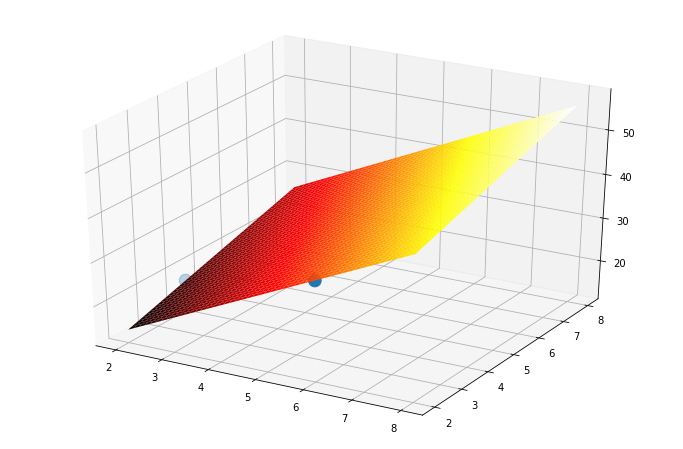

In [130]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection="3d")

X=A
y=B

X1=X[:, 0].reshape(X.shape[0])
X2=X[:, 1].reshape(X.shape[0])
ax.scatter3D(X1, X2, y, cmap='hsv', marker= 'o', s = [160,160])

X1=np.linspace(2,8,50)
X2=np.linspace(2,8,50)
x_surf, y_surf = np.meshgrid(X1, X2)
z_surf= x_surf *5 +  y_surf * 2 
from matplotlib import cm
ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.hot)    # plot a 3d surface plot
plt.show()


## Boston by matrix

In [131]:
from sklearn import datasets
ds= datasets.load_boston()

In [132]:
import pandas as pd

X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = ds.target
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [134]:
b=np.ones((X_train.shape[0], 1))
b.shape

(404, 1)

In [135]:
X_train=np.hstack((X_train, b))

In [136]:
# np.linalg.inv(A.T @ A) @ A.T @ B
W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
W

array([-1.20078865e-01,  5.03552244e-02,  2.31621187e-02,  2.24491845e+00,
       -1.61931176e+01,  4.05990464e+00, -1.55563487e-02, -1.54247443e+00,
        3.01490505e-01, -1.18814691e-02, -1.03199916e+00,  1.02340607e-02,
       -4.69911768e-01,  3.57309359e+01])

In [137]:
X_test.shape, W.shape, y_test.shape

((102, 13), (14,), (102,))

In [138]:
b=np.ones((X_test.shape[0], 1))
b.shape

(102, 1)

In [139]:
X_test=np.hstack((X_test, b))

In [140]:
SSE = ((X_test @ W - y_test ) ** 2).sum() 
MSE = SSE / y_test.shape[0]
MSE

21.7413441907518

In [141]:
RMSE = MSE ** (1/2)
RMSE

4.662761434037967

## R^2 公式
https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

In [142]:
y_mean = y_test.ravel().mean()
SST = ((y_test - y_mean) ** 2).sum()
R2 = 1 - (SSE / SST)
R2

0.711085818837043